In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import neuro_morpho_toolbox as nmt
%matplotlib inline
#ns=nmt.neuron_set('/home/penglab/Documents/Janelia_1000')
import pickle
pickle_in = open("/home/penglab/FeaCal/ns.pickle","rb")
example_ = pickle.load(pickle_in)
ns= example_[0]

In [25]:
AP_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_hierDF.xlsx', index_col=0)
AP_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_kmeansDF.xlsx', index_col=0)
AP_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_dbscanDF.xlsx', index_col=0)
AP_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_hdbscanDF.xlsx', index_col=0)
AP_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/axonProj/AP_snnDF.xlsx', index_col=0)
SL_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hierDF.xlsx', index_col=0)
SL_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_kmeansDF.xlsx', index_col=0)
SL_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_dbscanDF.xlsx', index_col=0)
SL_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hdbscanDF.xlsx', index_col=0)
SL_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_snnDF.xlsx', index_col=0)

In [4]:

import neuro_morpho_toolbox as nmt
ns = nmt.neuron_set('/home/penglab/Documents/Janelia_1000')



/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/
Loading CCF Atlas data...
Loading time: 0.87
Loading CCF brain structure data...
Loading time: 0.01
Loading...
number of files under swc_path: 1002
100 loaded: 2.5s
Invalid number of soma found: 0
QC failed: AA0114.swc
Invalid number of soma found: 0
QC failed: AA0115.swc
200 loaded: 1.9s
300 loaded: 2.4s
400 loaded: 2.5s
Invalid number of soma found: 0
QC failed: AA0472.swc
500 loaded: 2.4s
Invalid number of soma found: 0
QC failed: AA0576.swc
Invalid number of soma found: 0
QC failed: AA0585.swc
Invalid number of soma found: 0
QC failed: AA0589.swc
600 loaded: 2.3s
Invalid number of soma found: 0
QC failed: AA0639.swc
Invalid number of soma found: 0
QC failed: AA0670.swc
Invalid number of soma found: 0
QC failed: AA0672.swc
700 loaded: 2.2s
Invalid number of soma found: 0
QC failed: AA0754.swc
Invalid number of soma found: 0
QC failed: AA0763.swc
800 loaded: 2.8s
900 loaded: 2.1s
QC failed: AA0952.swc
QC failed

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/neuron_features.py:337: RuntimeWarning:

divide by zero encountered in true_divide

/home/penglab/anaconda3/lib/python3.7/site-packages/neuro_morpho_toolbox/neuron_features.py:337: RuntimeWarning:

invalid value encountered in true_divide



## Set Color

In [5]:
import seaborn as sns; sns.set()




colorlist=["#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02",
           "#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C",
           "#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3",
           "#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8",
           "#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00",
           "#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F",
           "#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5",
           "#D9D9D9","#BC80BD","#CCEBC5"]
lut = dict(zip(ns.metadata['CellType'].unique(), colorlist))
row_colors = ns.metadata['CellType'].map(lut)
row_colors[row_colors.isnull()]='white'

# Plot cocluster 

In [17]:

from scipy.spatial import distance
from scipy.cluster import hierarchy
import numpy as np

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster,inconsistent
#print the cocluster result
#output the linkage matrix
def bestCOCLUSTER(df):
    linkmethod = ['single', 'complete','average','weighted','centroid','median','ward']
    paraDF = pd.DataFrame(columns =['method','CCC'],index = linkmethod)
    paraDF.loc[:,'method'] = linkmethod
    
    for iter_m in linkmethod:
        Y = distance.pdist(np.asarray(df))
        Z = hierarchy.linkage(Y, method = iter_m)
        c, coph_dists = hierarchy.cophenet(Z,Y)
        paraDF.loc[iter_m,'CCC'] = c
    paraDF.sort_values(by='CCC', ascending = False, inplace = True)
    #print(paraDF)
    row_linkage = hierarchy.linkage(distance.pdist(np.asarray(df)), method = paraDF.iloc[0,0])

    col_linkage = hierarchy.linkage(distance.pdist(np.asarray(df).T), method = paraDF.iloc[0,0])
    #print(paraDF.iloc[0,0])
    sns.clustermap(df, row_linkage = row_linkage, col_linkage = col_linkage, row_colors=row_colors ,col_colors = row_colors, figsize=(13, 13))#, cmap=sns.diverging_palette(h_neg=150, h_pos=275, s=80, l=55, as_cmap=True))    
    return hierarchy.linkage(distance.pdist(np.asarray(df)))



def coclusterResult(Z_sample):
    t = input('Please input the number of cluster: ')
    return fcluster(Z_sample,t,criterion='maxclust')

## Set neuron_set.metadata['Cluster']

From featureDF we can generate the corresponding UMAP, then we will use the coclustering result to perfrom fcluster, then set the ['cluster']result

In [7]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
 
    return list(duplicateColumnNames)

* scaleData is the dataframe containing features extracted from Vaa3D
* Z_Sample is the condensed distance matrix from cocluster

In [23]:
import pickle
def generateNS(featureDF,ns_input,Z_sample,storePath,outname):
    if featureDF.shape!= (0,0):
        ns_input = nmt.neuron_set('/home/penglab/Documents/Janelia_1000')

        index_origin = ns_input.metadata.index.tolist()
        ns_input.UMAP = nmt.UMAP_wrapper(featureDF, n_neighbors=100, min_dist=0.1, n_components=2, metric='euclidean',
                                   PCA_first=True,n_PC=100)
        index_after = ns_input.UMAP.index.tolist()
        index_update = [i for i in index_origin if i in index_after ]
        ns_input.metadata = ns_input.metadata.loc[index_update,:]
        ns_input.UMAP = ns_input.UMAP .loc[index_update,:]
    
    cur_clusters = coclusterResult(Z_sample)
    ns_input.metadata['Cluster'] = ['C' + str(i) for i in cur_clusters] 
    _ = ns_input.FeatureScatter(["CellType", "Hemisphere","Cluster"], map="UMAP")
    pickle.dump([ns_input], open(storePath+str(outname)+'.pickle', "wb"))

## For soma location features

In [26]:
_ = ns.ReduceDimUMAP(feature_set="soma_features", n_neighbors=100)


#### Hierarchy 

Please input the number of cluster: 6


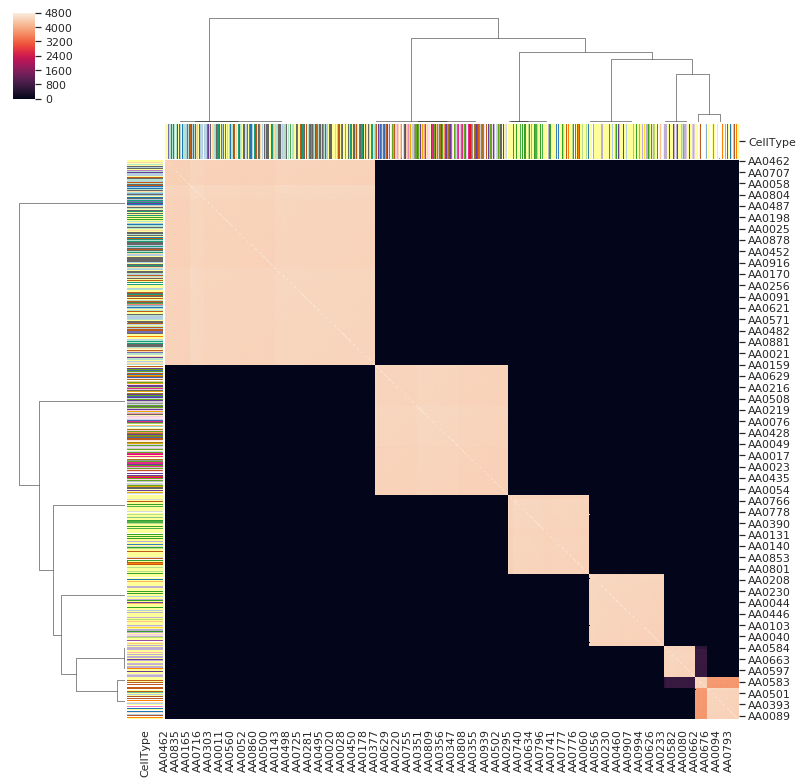

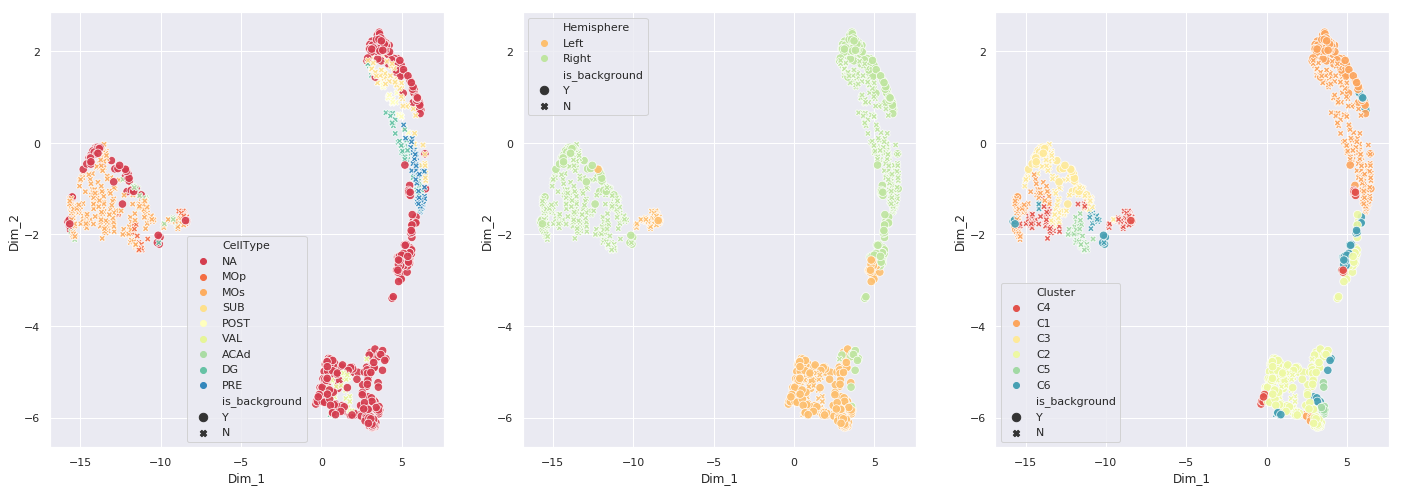

In [24]:
Ztemp= bestCOCLUSTER(SL_hierDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_hier_ns')

#### Kmeans

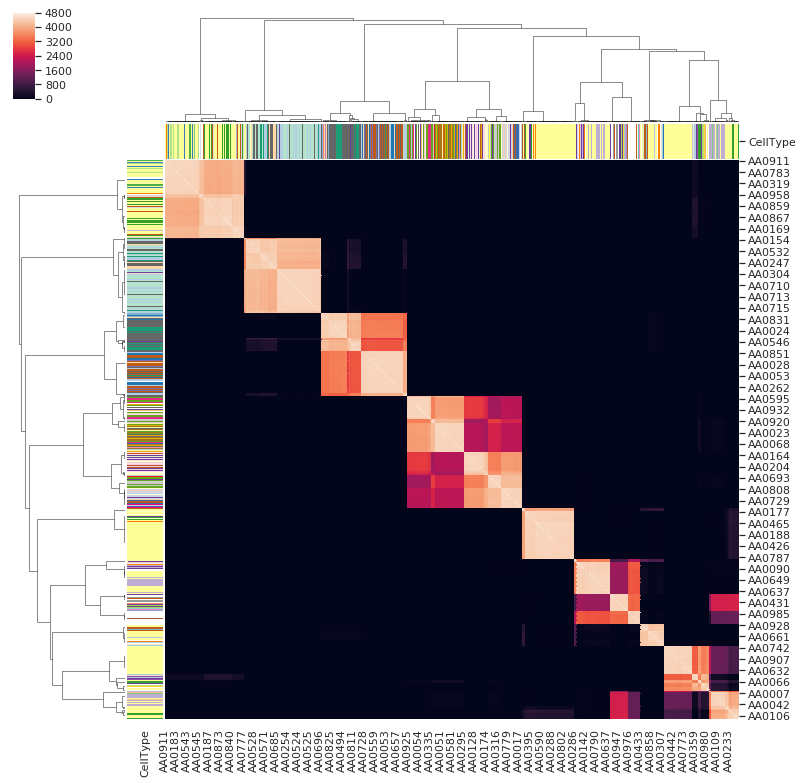

In [28]:
Ztemp= bestCOCLUSTER(SL_kmeansDF)

Please input the number of cluster: 8


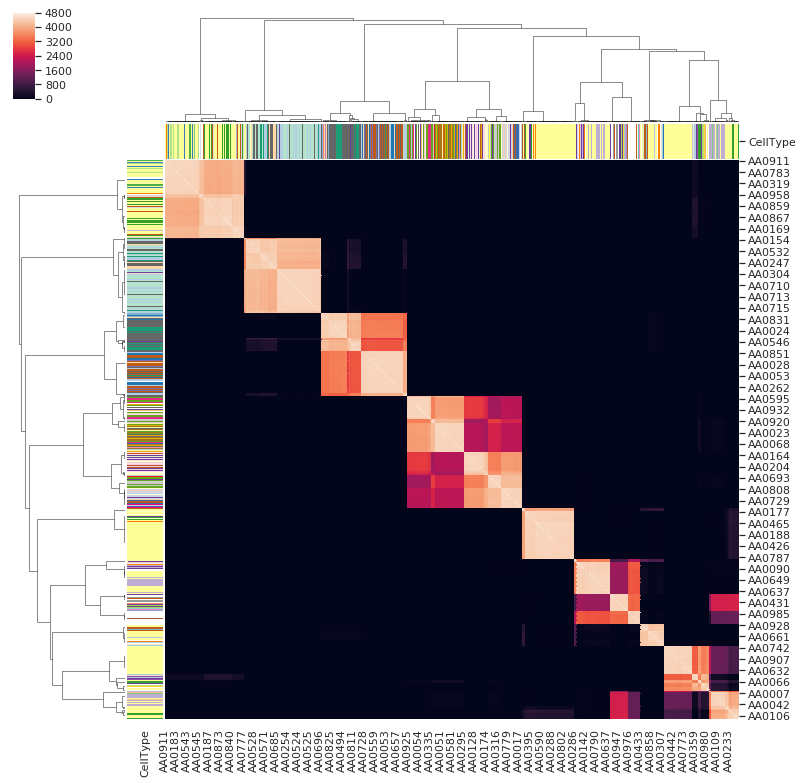

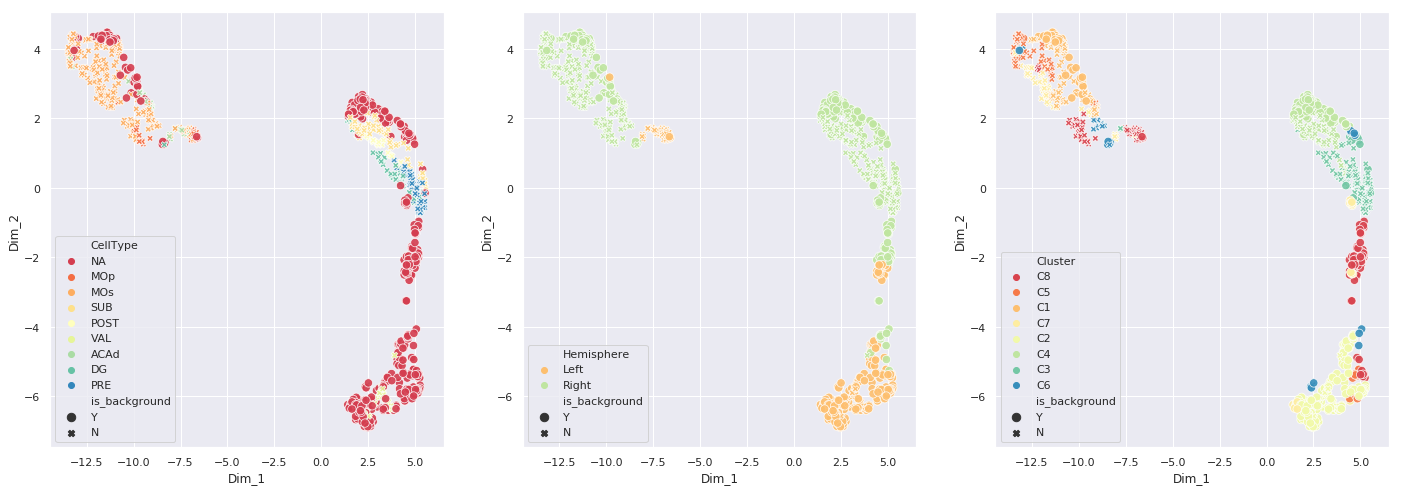

In [29]:
Ztemp= bestCOCLUSTER(SL_kmeansDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_kmeans_ns')

#### DBSCAN 

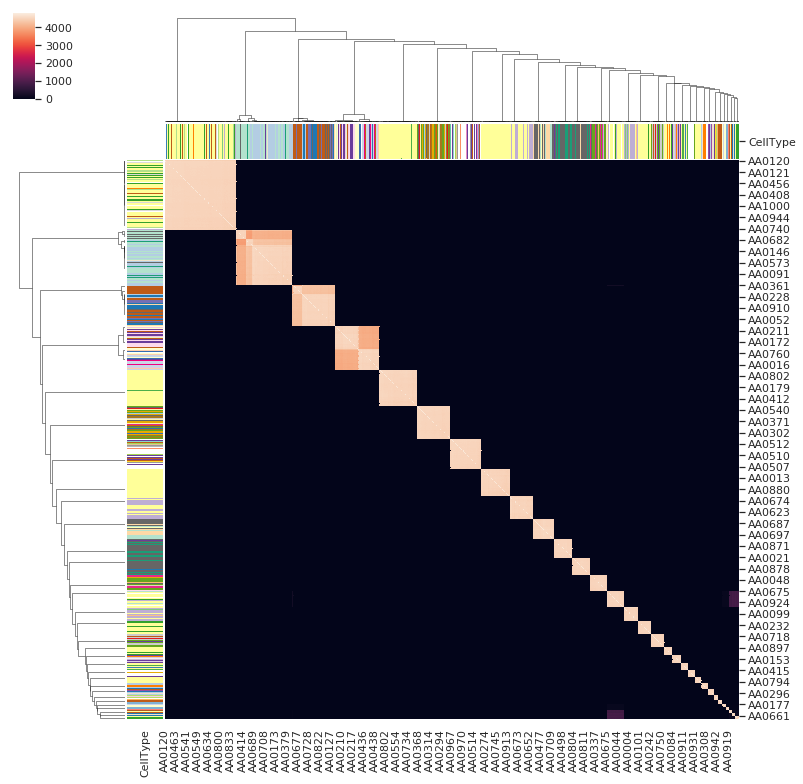

In [30]:
Ztemp= bestCOCLUSTER(SL_dbscanDF)

Please input the number of cluster: 30


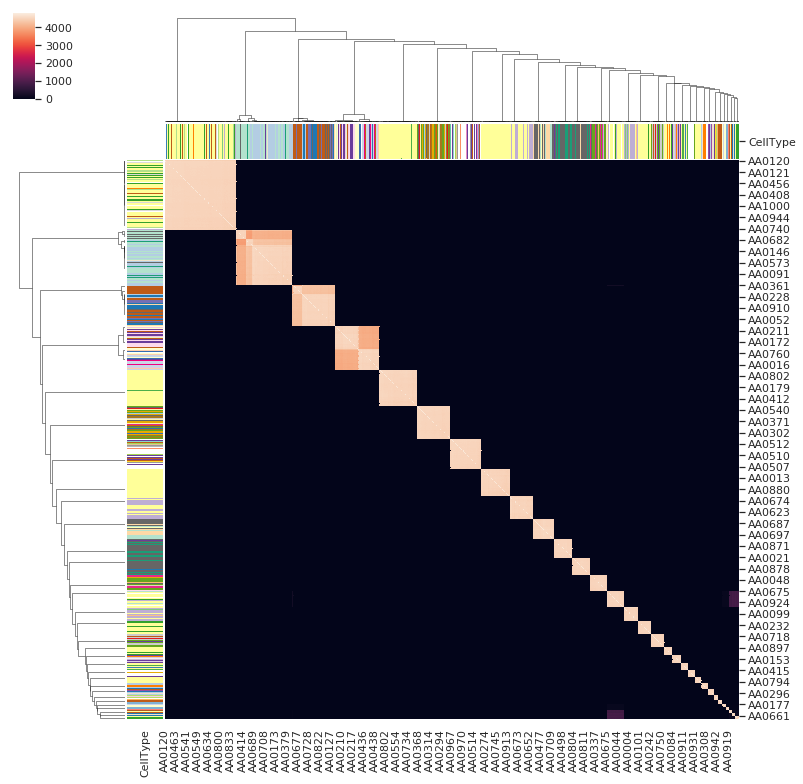

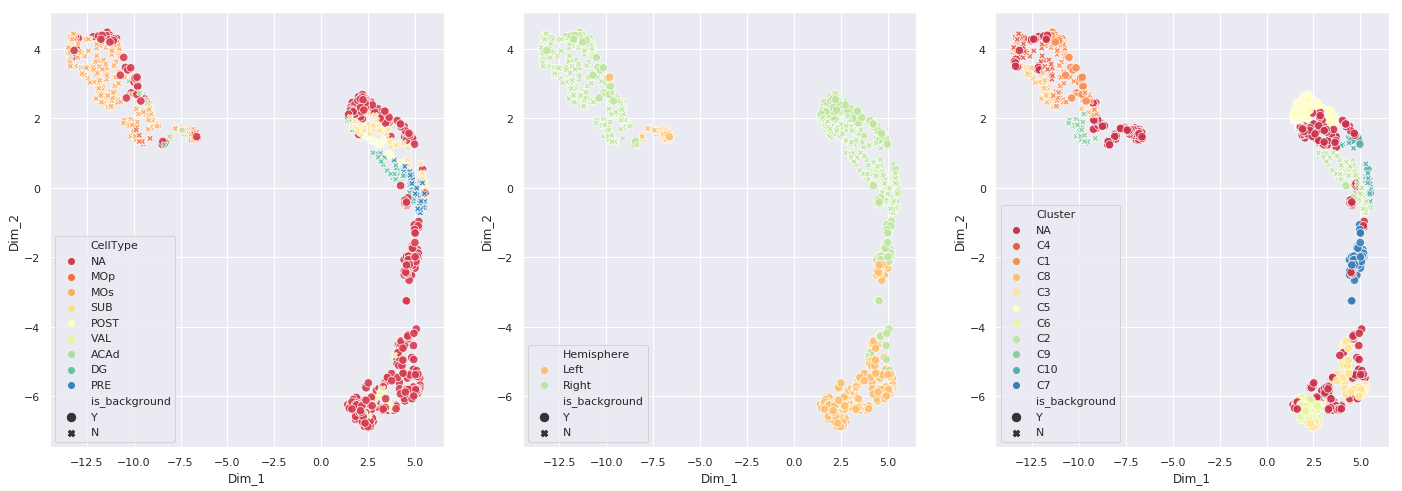

In [31]:
Ztemp= bestCOCLUSTER(SL_dbscanDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_dbscan_ns')

#### HDBSACN

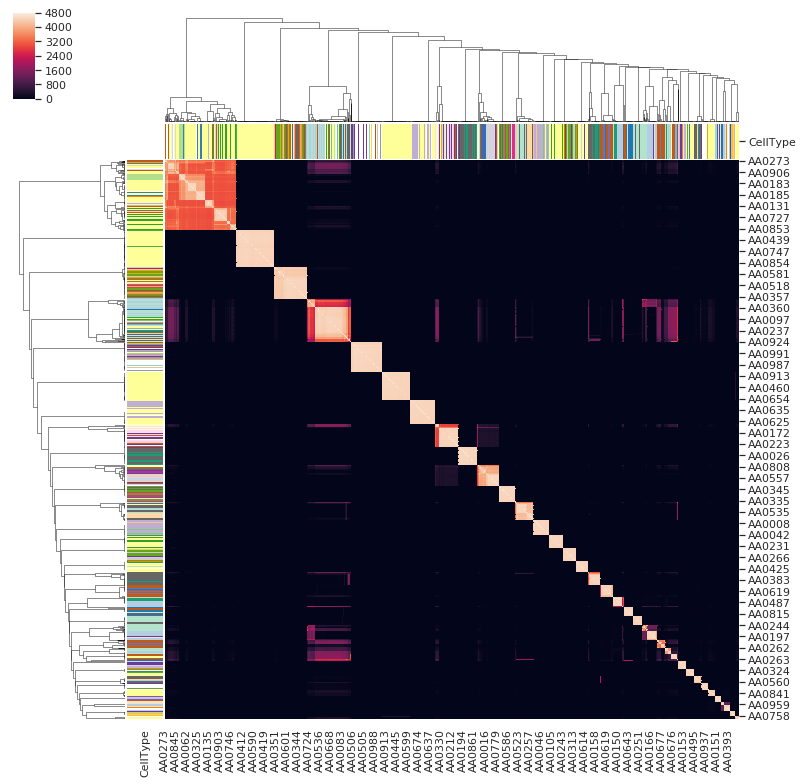

In [32]:
Ztemp= bestCOCLUSTER(SL_hdbscanDF)

Please input the number of cluster: 35


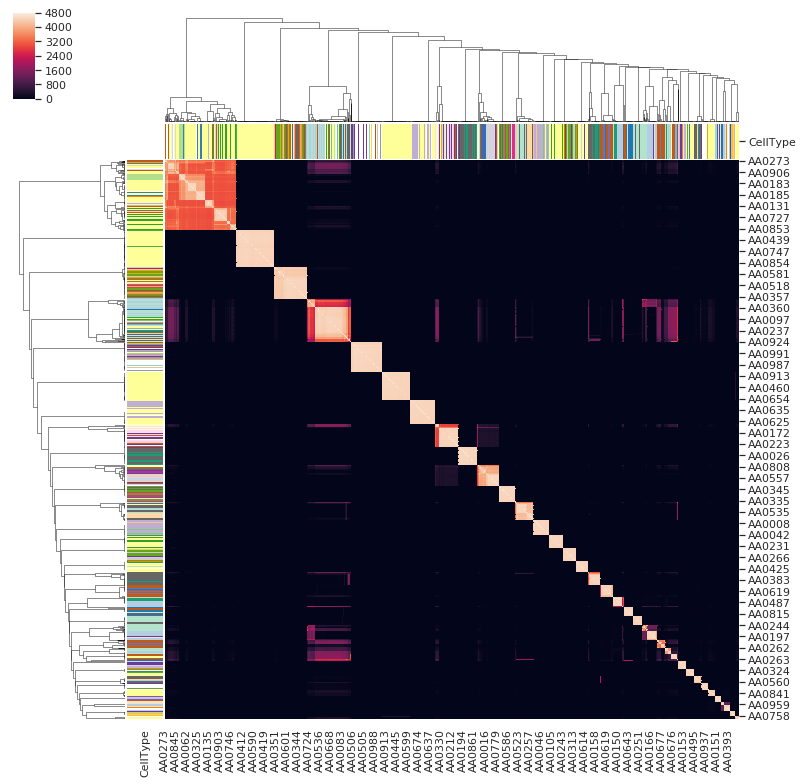

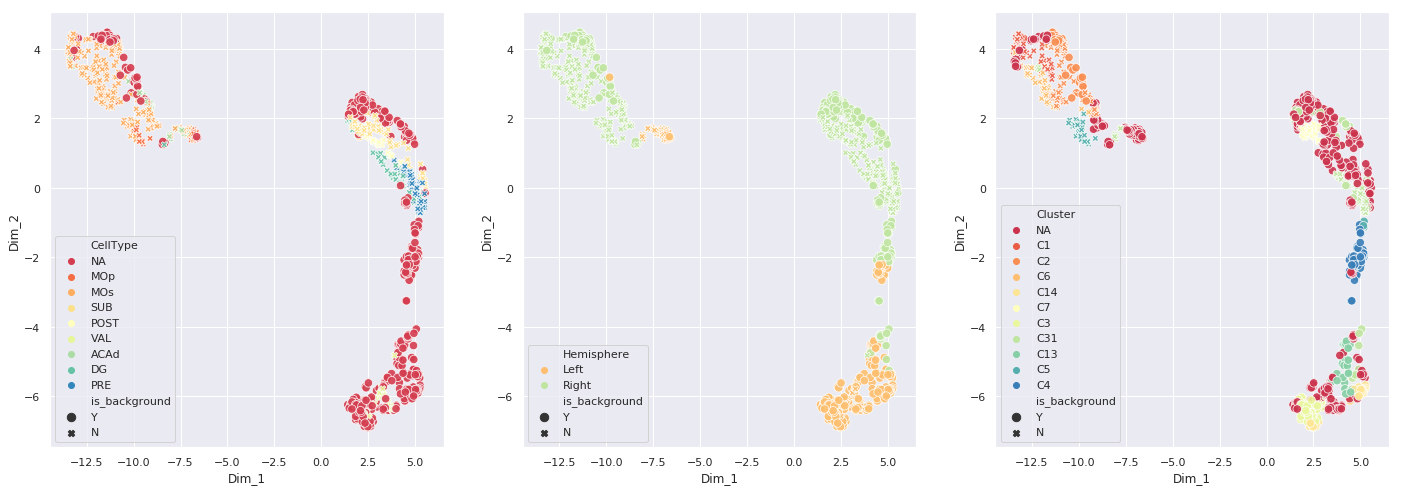

In [33]:
Ztemp= bestCOCLUSTER(SL_hdbscanDF)
generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_hdbscan_ns')

#### SNN

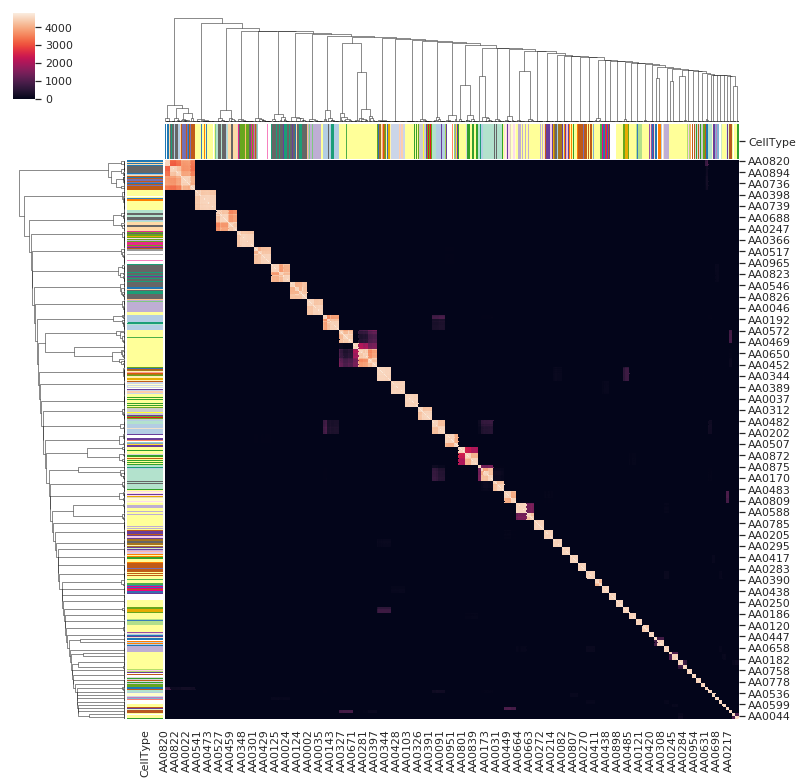

In [34]:
Ztemp= bestCOCLUSTER(SL_snnDF)

Please input the number of cluster: 56


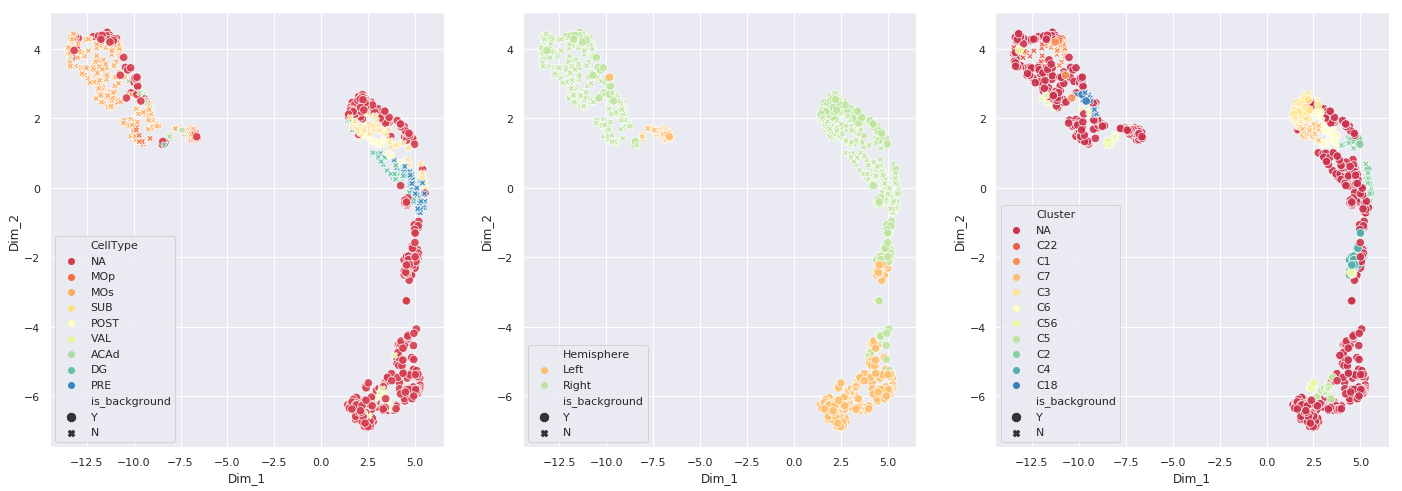

In [35]:

generateNS(pd.DataFrame(),ns,Ztemp,'/home/penglab/FeaCal/','SL_snsn_ns')

In [10]:
SL_hierDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hierDF.xlsx', index_col=0)
SL_kmeansDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_kmeansDF.xlsx', index_col=0)
SL_dbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_dbscanDF.xlsx', index_col=0)
SL_hdbscanDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_hdbscanDF.xlsx', index_col=0)
SL_snnDF = pd.read_excel('/home/penglab/FeaCal/dataSource/somaLoc/SL_snnDF.xlsx', index_col=0)

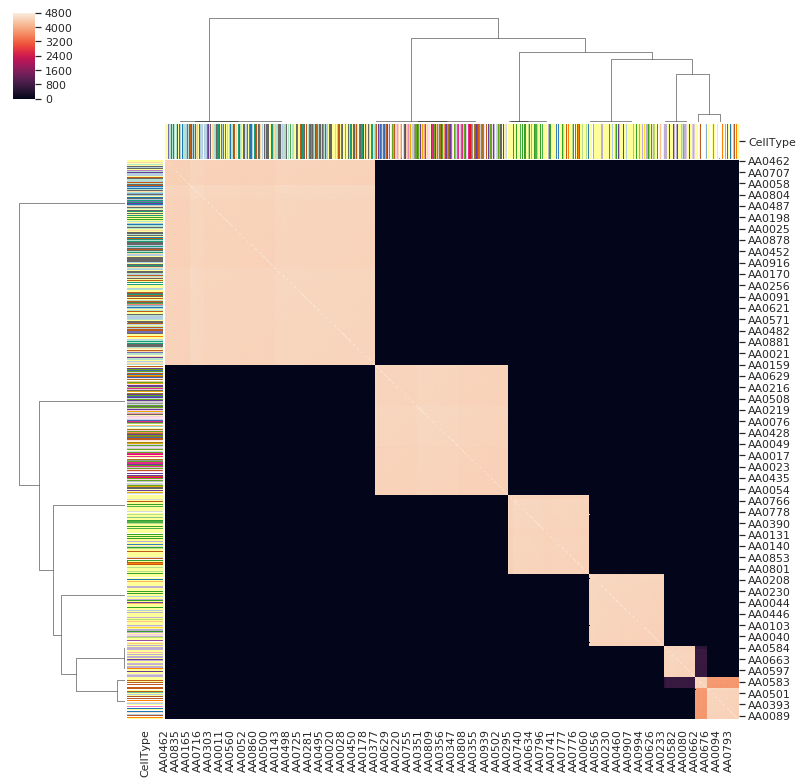

In [11]:

bestCOCLUSTER(SL_hierDF)

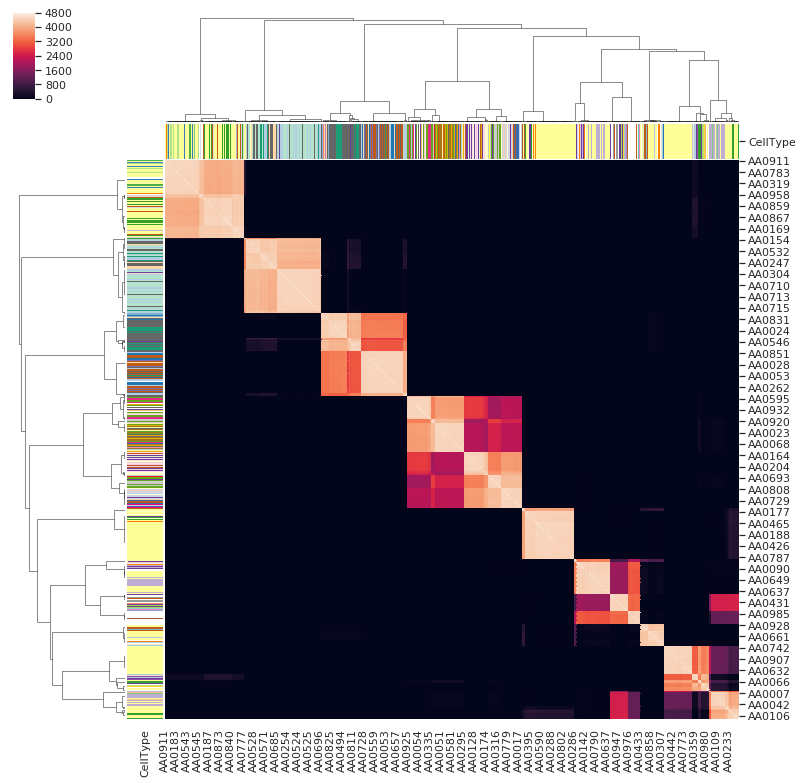

In [12]:

bestCOCLUSTER(SL_kmeansDF)

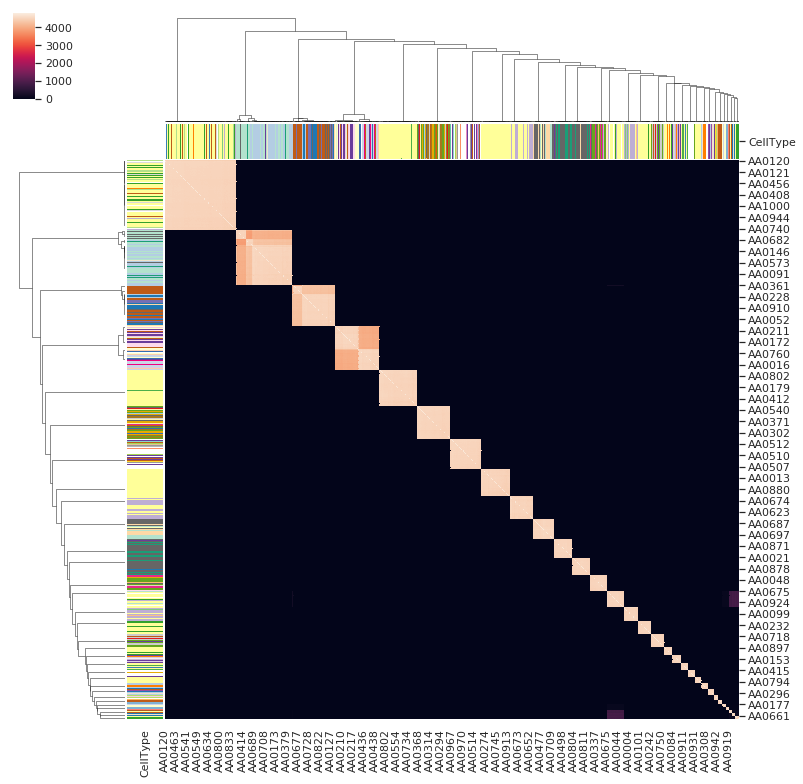

In [13]:

bestCOCLUSTER(SL_dbscanDF)

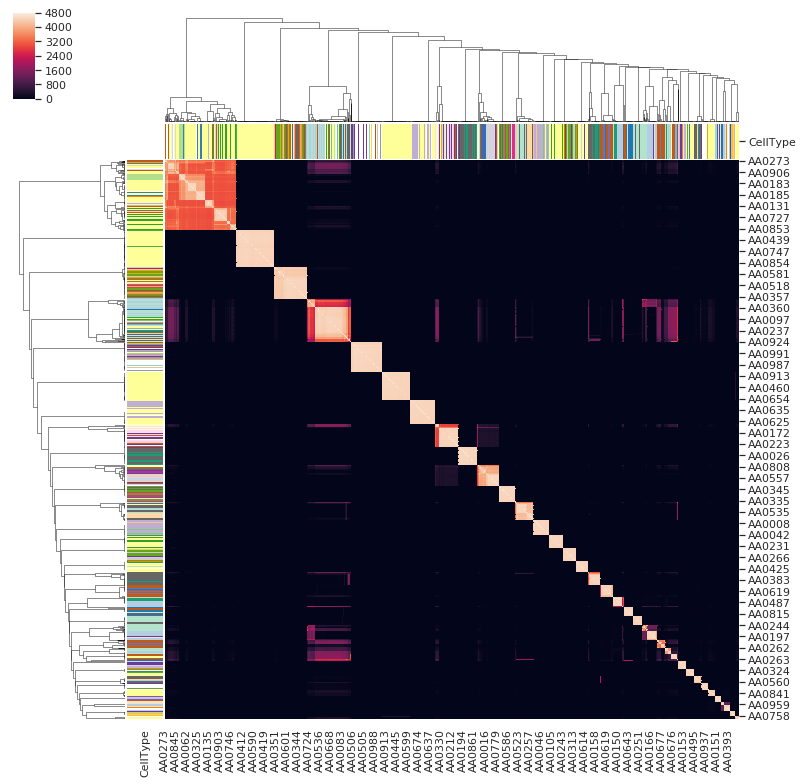

In [14]:

bestCOCLUSTER(SL_hdbscanDF)

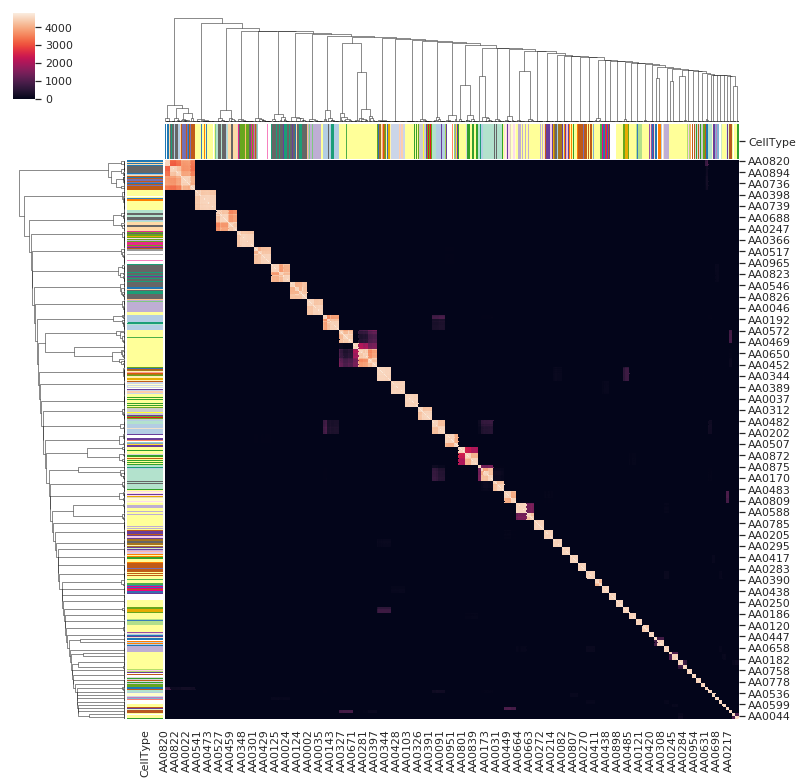

In [15]:

bestCOCLUSTER(SL_snnDF)

# Cocluster for axon morphology

# Cocluster for dendrite morphology

# Summary of clustering property

In [16]:

cluster_type = ['Hierarchy','Kmeans','DBSCAN','HDBSCAN','SNN']
colname = ['ARI_'+i for i in cluster_type]
colname = colname + (['num of cluster_'+i for i in cluster_type])
summary_cluster = pd.DataFrame(index = ['axon projection','soma location', 'axon morphology', 
                            import neuro_morpho_toolbox as nmt
%matplotlib inline            'dendrite morphology'],columns = colname)


In [17]:
summary_cluster.loc['axon projection',:]= [0.258210445492697,0.2129613044735105,0.2812503177620878,
                                               0.28287214992477994,0.22710873358441527,19,14, 24, 31, 31]
summary_cluster.loc['soma location',:]= [0.3268728951610669, 0.27863577689094327, 0.2630886481583674,
                                         0.26100195542904575,0.13064660013981225,9,10,29,34,65]
summary_cluster.loc['axon morphology',:] = [0.08785414289406115, 0.08343509698163794, 0.10187925011450155,
                                            0.05177167199451809,0.06673692576743263,8,8,8,39,23]
summary_cluster.loc['dendrite morphology',:]= [0.05355799672049869, 0.036079814213255956, 
                                               0.039530673163787826, 0.020481889417205506, 0.045224072138369056,
                                               8,13,20,21,18]
summary_cluster

,ARI_Hierarchy,ARI_Kmeans,ARI_DBSCAN,ARI_HDBSCAN,ARI_SNN,num of cluster_Hierarchy,num of cluster_Kmeans,num of cluster_DBSCAN,num of cluster_HDBSCAN,num of cluster_SNN
axon projection,0.25821,0.212961,0.28125,0.282872,0.227109,19,14,24,31,31
soma location,0.326873,0.278636,0.263089,0.261002,0.130647,9,10,29,34,65
axon morphology,0.0878541,0.0834351,0.101879,0.0517717,0.0667369,8,8,8,39,23
dendrite morphology,0.053558,0.0360798,0.0395307,0.0204819,0.0452241,8,13,20,21,18


# Extract cluster from co-cluster matrix

NameError: name 'fcluster' is not defined

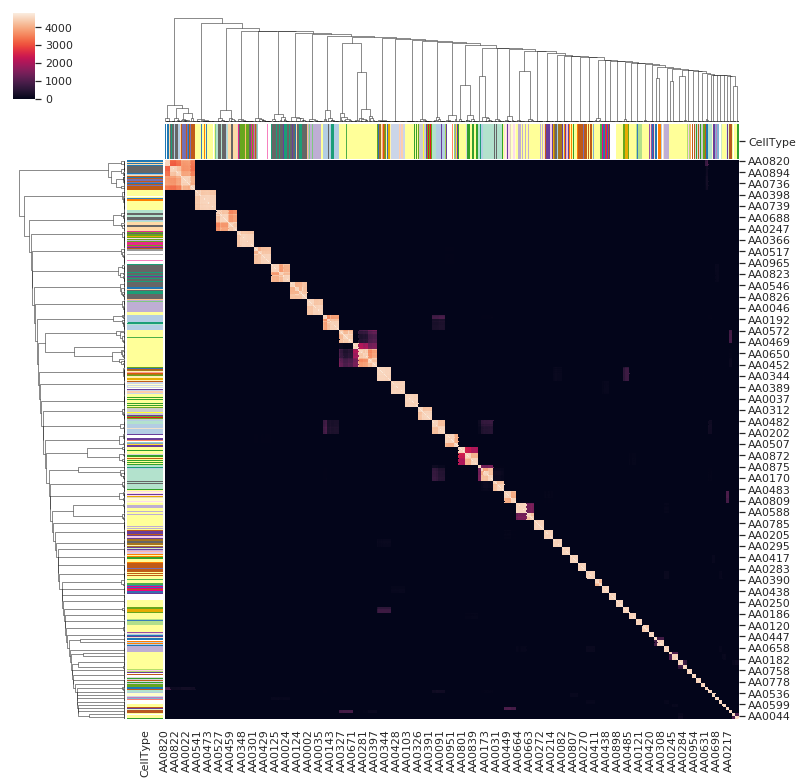

In [27]:
    df = SL_snnDF.copy()
    linkmethod = ['single', 'complete','average','weighted','centroid','median','ward']
    paraDF = pd.DataFrame(columns =['method','CCC'],index = linkmethod)
    paraDF.loc[:,'method'] = linkmethod
    
    correlations = df.corr()
    correlations_array = np.asarray(df.corr())
    for iter_m in linkmethod:
        Y = distance.pdist(np.asarray(df))
        Z = hierarchy.linkage(Y, method = iter_m)
        c, coph_dists = hierarchy.cophenet(Z,Y)
        paraDF.loc[iter_m,'CCC'] = c
    paraDF.sort_values(by='CCC', ascending = False, inplace = True)
    #print(paraDF)
    row_linkage = hierarchy.linkage(distance.pdist(np.asarray(df)), method = paraDF.iloc[0,0])

    col_linkage = hierarchy.linkage(distance.pdist(np.asarray(df).T), method = paraDF.iloc[0,0])
    #print(paraDF.iloc[0,0])
    sns.clustermap(df, row_linkage = row_linkage, col_linkage = col_linkage, row_colors=row_colors ,col_colors = row_colors, figsize=(13, 13))#, cmap=sns.diverging_palette(h_neg=150, h_pos=275, s=80, l=55, as_cmap=True))    


### Check difference between pdist, linkage and ward

distance.pdist(np.asarray(df)) == hierarchy.linkage(df)

## Test fcluster

Please input the number of cluster15


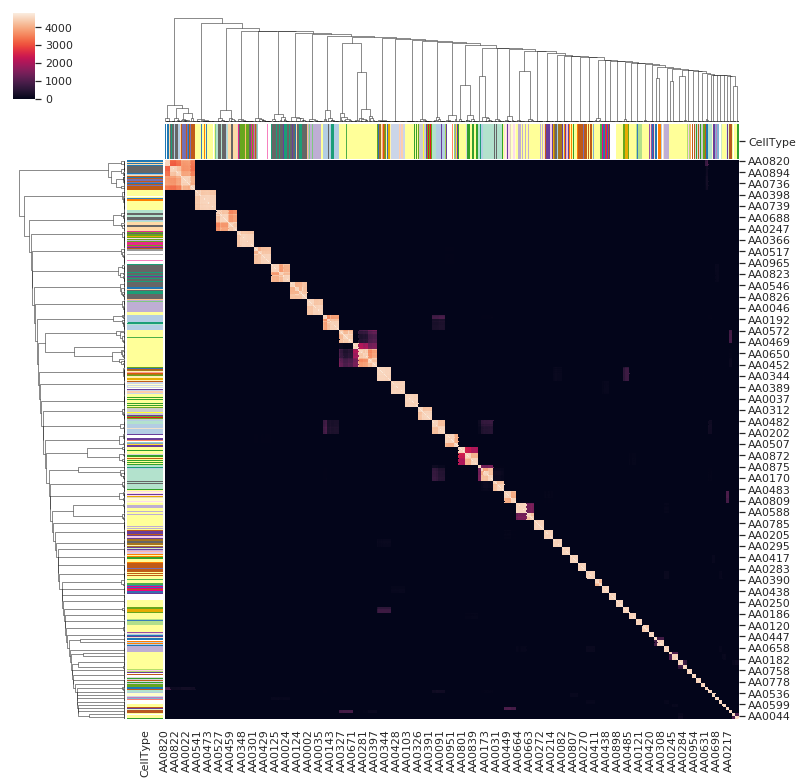

In [59]:
coclusterResult(df)

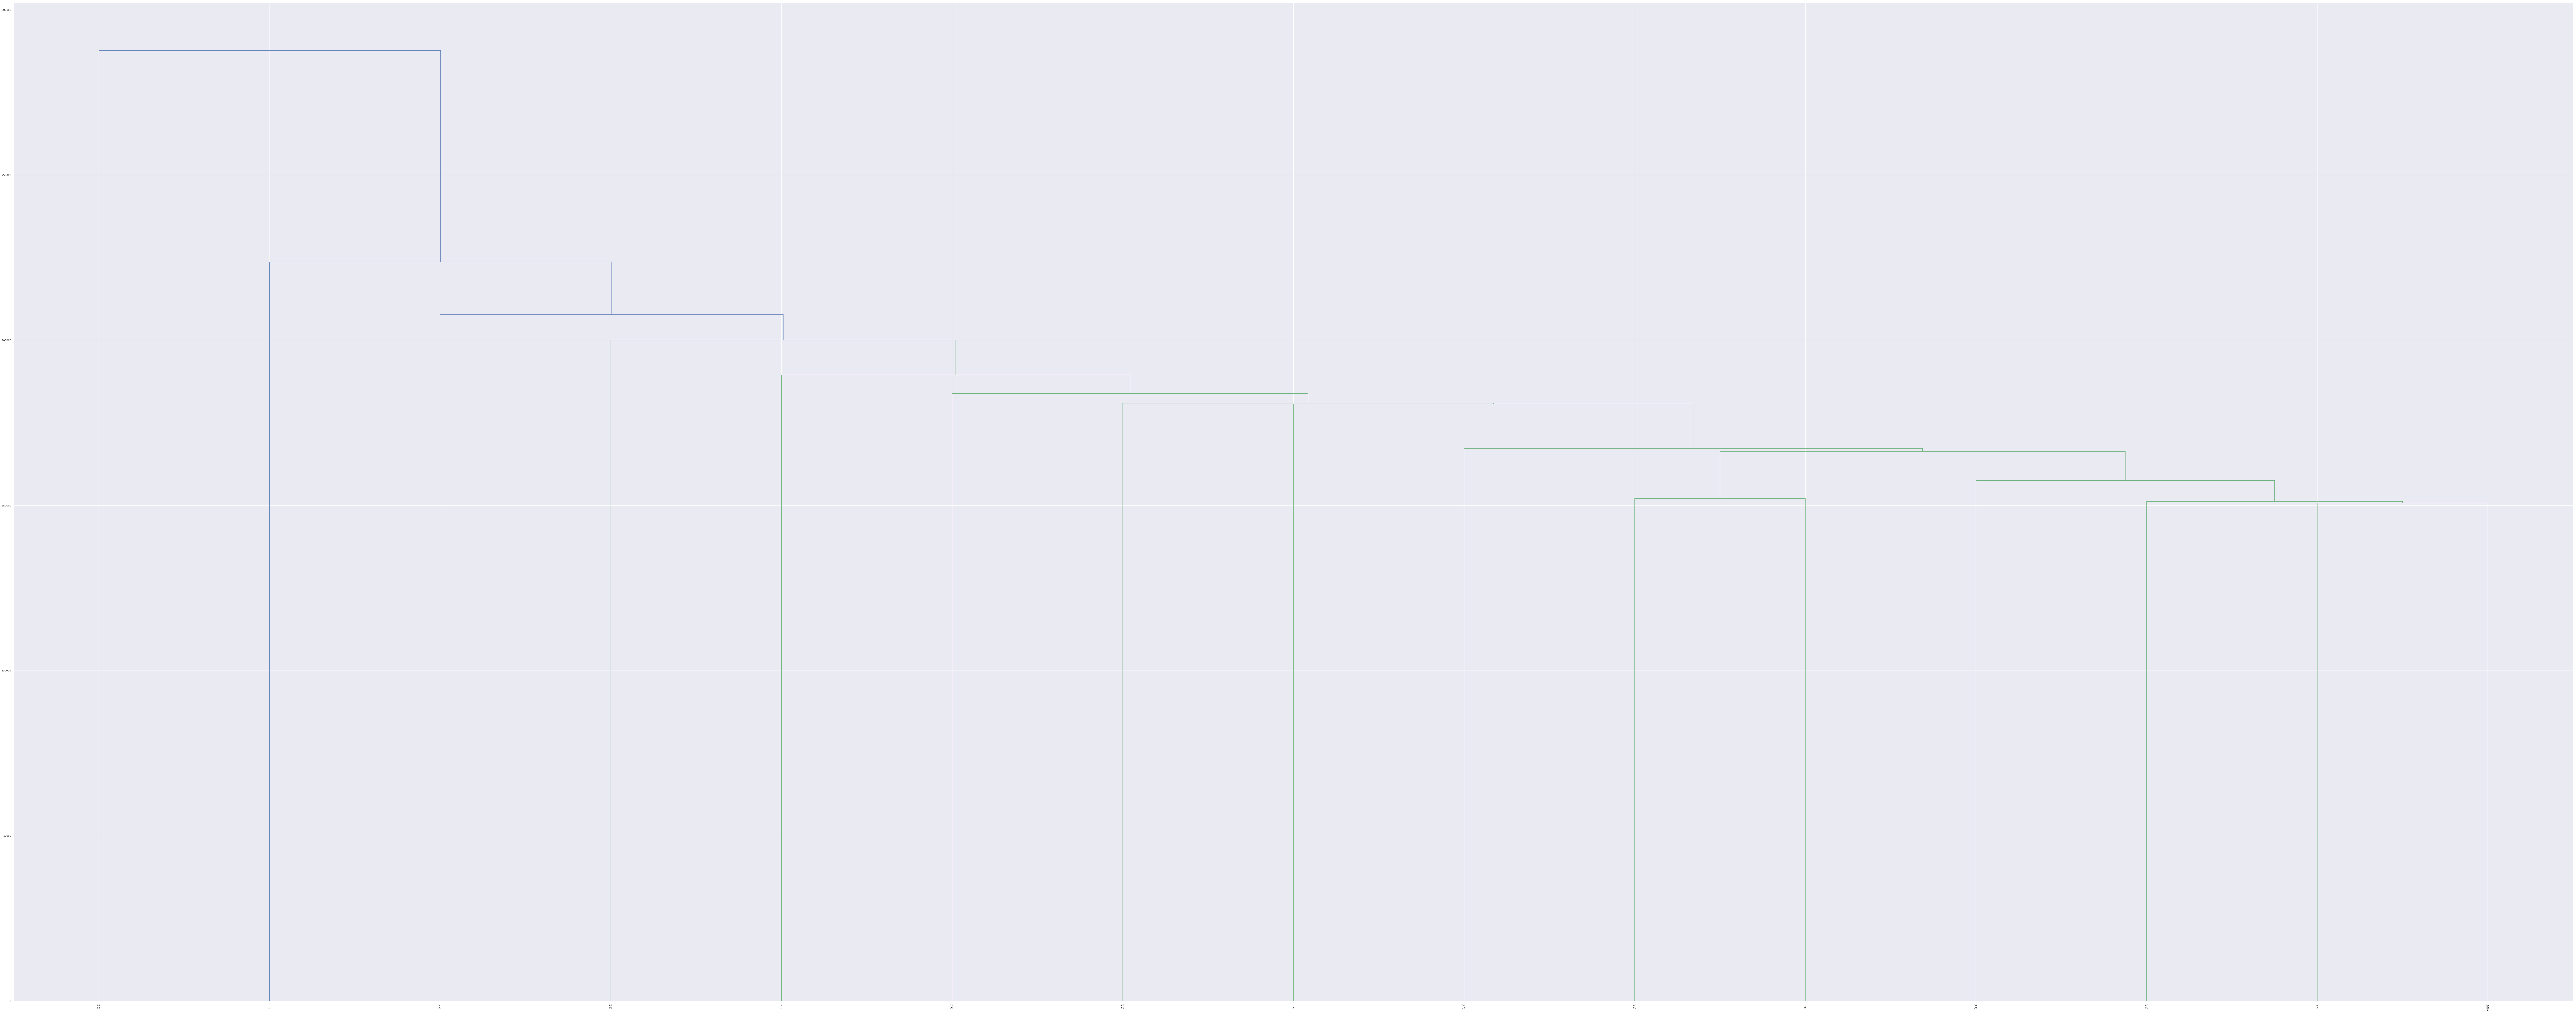

In [44]:

fig, ax = plt.subplots(1, 1, figsize=(200, 80))
d = dendrogram(Z, labels=df.index, leaf_rotation=90,
               truncate_mode='lastp',  # show only the last p merged clusters
               p=15,  # show only the last p merged clusters
               orientation="top", color_threshold=None,
                   )

In [47]:
d['leaves']

[1910,
 1888,
 1907,
 1955,
 1904,
 1895,
 1897,
 1884,
 1889,
 1906,
 1953,
 1925,
 1827,
 1819,
 1958]

In [25]:
aaa.dendrogram_col.reordered_ind

[808,
 51,
 614,
 933,
 718,
 898,
 806,
 807,
 721,
 897,
 491,
 489,
 52,
 556,
 836,
 492,
 558,
 487,
 809,
 810,
 882,
 358,
 560,
 817,
 357,
 359,
 857,
 878,
 565,
 56,
 57,
 124,
 884,
 488,
 845,
 26,
 631,
 612,
 21,
 27,
 726,
 839,
 794,
 224,
 852,
 157,
 563,
 570,
 555,
 24,
 802,
 225,
 559,
 398,
 460,
 405,
 461,
 537,
 61,
 541,
 395,
 633,
 738,
 917,
 985,
 11,
 545,
 769,
 322,
 454,
 180,
 453,
 400,
 722,
 407,
 772,
 469,
 771,
 539,
 114,
 729,
 546,
 544,
 401,
 984,
 549,
 182,
 137,
 932,
 255,
 246,
 474,
 699,
 528,
 475,
 523,
 531,
 677,
 156,
 455,
 678,
 473,
 519,
 472,
 527,
 372,
 384,
 524,
 371,
 534,
 196,
 696,
 675,
 254,
 456,
 711,
 245,
 694,
 673,
 692,
 244,
 687,
 606,
 249,
 604,
 198,
 49,
 46,
 47,
 53,
 586,
 588,
 448,
 345,
 643,
 336,
 584,
 580,
 665,
 73,
 363,
 574,
 591,
 909,
 347,
 332,
 350,
 369,
 54,
 334,
 343,
 342,
 298,
 361,
 509,
 910,
 505,
 511,
 935,
 431,
 513,
 975,
 958,
 974,
 959,
 977,
 512,
 953,
 956,
 9

In [26]:
row_linkage 

array([[4.39000000e+02, 7.60000000e+02, 2.93852004e+02, 2.00000000e+00],
       [2.81000000e+02, 2.88000000e+02, 2.96334271e+02, 2.00000000e+00],
       [3.03000000e+02, 3.04000000e+02, 2.98876229e+02, 2.00000000e+00],
       ...,
       [1.90600000e+03, 1.96900000e+03, 3.14163038e+04, 8.98000000e+02],
       [1.87000000e+03, 1.97000000e+03, 3.30348223e+04, 9.34000000e+02],
       [1.91000000e+03, 1.97100000e+03, 3.48412472e+04, 9.87000000e+02]])